# first i go to kaggle, your profile, settings, API create a new token
# then put that kaggle.json in the content in google colab

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                            135KB  2025-01-26 19:53:28          12226        176  1.0              
adilshamim8/education-and-career-success                          Education & Career Success.                  118KB  2025-02-03 05:24:20           2849         54  1.0              
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                    1MB  2025-01-03 10:33:01          19938        495  1.0              
hubertsidorowicz/football-players-stats-2024-2025                 Football Players St

In [ ]:
!kaggle competitions download -c titanic
!unzip titanic.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
import pandas as pd

titanic_data=pd.read_csv('train.csv')
print(titanic_data.head())
print(titanic_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# mean i usually use when there is a non huge standard deviation
# median when there are more outliers. is more representative the median
# mode if is not very spread out



In [ ]:
titanic_data['filled_Age']= titanic_data['Age'].fillna(titanic_data.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [ ]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,filled_Age
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,26.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [ ]:
train_data=titanic_data[titanic_data['Age'].notnull()]   #to train machine
test_data=titanic_data[titanic_data['Age'].isnull()]   #to predict with the rest of ages values

#train data with no null values is used to train the machine because we need this data to train
#test data with the null values is used to predict the rest of values of ages that i dont have


In [ ]:
features= ['Pclass','Sex','SibSp','Parch','Fare']
#this all features can help me predict the ages that are missing

In [ ]:
titanic_data['Sex'].unique()


#to make sure that only have male and female and not MalE or written different

array(['male', 'female'], dtype=object)

In [ ]:
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})
#take categorical column and twist it in numerical column

<ipython-input-131-3f3d7d5a76b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})
<ipython-input-131-3f3d7d5a76b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})


In [ ]:
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,filled_Age
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,35.0


In [ ]:
#next step is to define the module
from sklearn.linear_model import LinearRegression

#i need to define so then i can use it:
model = LinearRegression()

#in order to teach this model the function is:
model.fit(train_data[features],train_data['Age'])
# the columns of features will train the module, and then we predict the age column

LinearRegression()

In [ ]:
titanic_data['missing_Age']=titanic_data['Age']

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  714 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [ ]:
#to change the nulls values of age:
#im going to locate the rows that i would like to impute, with a condition: if age is null. give me all the rows that age is null and i want the age rows. abd predict the test data based
#based on the features
titanic_data.loc[titanic_data['missing_Age'].isnull(),'missing_Age']=model.predict(test_data[features])

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


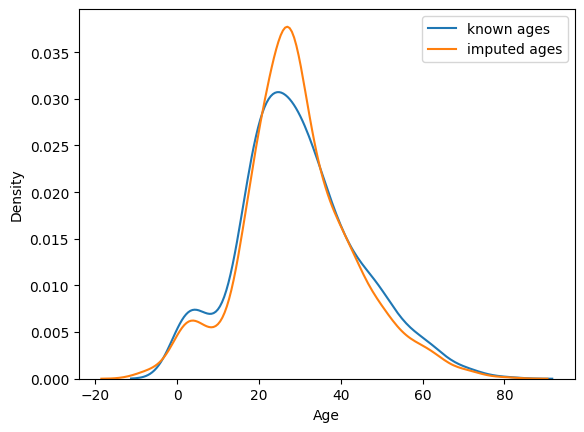

In [ ]:
#compare the distribuition
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(titanic_data['Age'][titanic_data['Age'].notnull()],label="known ages")
sns.kdeplot(titanic_data['missing_Age'],label="imputed ages")

plt.legend()
plt.show()

In [ ]:
titanic_data['encoded_Sex']=titanic_data['Sex'].map({'male':0,'female':1})

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  891 non-null    float64
 14  encoded_Sex  891 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 104.5+ KB


In [ ]:
titanic_data.describe()

NameError: name 'titanic_data' is not defined

In [ ]:
#Read the Titanic dataset
titanic_data= pd.read_csv('train.csv')

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
from faker import Faker

#initialize Faker
fake=Faker()

# Generate passenger demographics data
def generate_demographics_data(num_records):
  data=[]
  for i in range(1, num_records +1):   #assuming passenger id starts at 1. and same num of rows that i have
    record={
        "PassengerId":i,
        "Country":fake.country(),
        "Occupation":fake.job(),
        "Income":fake.random_int(20000,150000), #Randome income range
    }
    data.append(record)
  return pd.DataFrame(data)

  #Generate and export the synthetic dataset
num_passengers= 891 #Same as the titanic dataset
passenger_demographics=generate_demographics_data(num_passengers)
passenger_demographics.to_csv("passenger_demographics.csv",index=False)


  #read the synthetic passenger demografic dataset
passenger_demographics=pd.read_csv('passenger_demographics.csv')

  #perform data integration (merge datasets on PassengerID)
integrated_data=pd.merge(titanic_data,passenger_demographics,on='PassengerId', how='left')
  #left because keeps all the values on the left even if there is not a match on the right.
  # if there are new passenger ids there will be added

  #Explore the integrated dataset
print(integrated_data.head())

  #Optional: Save the integrated dataset
integrated_data.to_csv("integrated_titanic_data.csv",index=False)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  \
0      0         A/5 21171   7.2500   NaN        S   
1      0          PC 17599  71.2833   C85        C   
2      0  STON/O2. 3101282   7.9250   NaN        S   
3      0            113803  53.1000  C123        S   
4      0            373450   8.0500   NaN        S

In [ ]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Country      891 non-null    object 
 13  Occupation   891 non-null    object 
 14  Income       891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [ ]:
integrated_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Country,Occupation,Income
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Heard Island and McDonald Islands,Geophysicist/field seismologist,120594
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cyprus,"Conservation officer, nature",42341
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Oman,Logistics and distribution manager,85626
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Martinique,Horticultural consultant,29575
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Niue,Dispensing optician,116438


In [ ]:
integrated_data['Cabin']= integrated_data['Cabin'].fillna('Unknown')
#after this cabin will also have 891 values

In [ ]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Country      891 non-null    object 
 13  Occupation   891 non-null    object 
 14  Income       891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [ ]:
#Remove duplicate rows
titanic_data= titanic_data.drop_duplicates()

#Verify
print(titanic_data.duplicated().sum())

0


In [ ]:
#Remove irrelevant columns (eg 'Cabin' and 'Ticket')
titanic_data=titanic_data.drop(['Cabin','Ticket'],axis=1)

In [ ]:
#Outliers: only on quantitive rows
#possible income, fare(amount paid)
#we want to delete this outliers because they are not good for the analysis
#To take out outliers we use IQR range method
# Q1: 25th percentile
# Q3: 75 Percentile
#Maximum: Q3+1.5*IQR
#Minimum: Q1-1.5*IQR
#~ this sign means not in
# | this is or



# Aplicamos el IQR por cada columna individualmente
for column in ['Age', 'Fare', 'Income', 'SibSp', 'Parch']:
    Q1 = integrated_data[column].quantile(0.25)
    Q3 = integrated_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar filas basadas en cada columna por separado
    integrated_data = integrated_data[(integrated_data[column] >= lower_bound) & (integrated_data[column] <= upper_bound)]

#Este código eliminará solo las filas que contienen outliers en cada columna específica, sin afectar otras columnas que no tengan outliers.

#I wanna take out all the rows that are true in that condition(right or left from q1 and q3)

#integrated was the one which has income and that data


In [ ]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  453 non-null    int64  
 1   Survived     453 non-null    int64  
 2   Pclass       453 non-null    int64  
 3   Name         453 non-null    object 
 4   Sex          453 non-null    object 
 5   Age          453 non-null    float64
 6   SibSp        453 non-null    int64  
 7   Parch        453 non-null    int64  
 8   Ticket       453 non-null    object 
 9   Fare         453 non-null    float64
 10  Cabin        453 non-null    object 
 11  Embarked     453 non-null    object 
 12  Country      453 non-null    object 
 13  Occupation   453 non-null    object 
 14  Income       453 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 56.6+ KB
